# Random Forest

## Lesson Objectives

* Describe the relationship between decision trees and random forest
* Build and evaluate a random forest model with sklearn


## Lesson Road Map
* Ensemble models
* Bias/Variance
* Bagging (Bootstrap Aggregation)
* Subspace Sampling
* Random Forsest Classifier with Sklearn

## Ensemble Models

Ensemble models work by combine several differnt models together and aggregating the results.

**How can we combine multiple models together?**

**For a classification problem?**

**For a regression problem?**

In the case of random forest we will be using many decision trees and aggregating each of their results for the final prediciton.

<div>
<img src="images/ensembleHoML.png" width="500"/>
</div>
Hands on Machine Learning with Scikit


One helpful metaphor to better understand the power of ensemble models is the wisdom of the crowds. In 1906 Francis Galton asked around 700 fair goers to guess how much a cow weighed. Once all of the guesses were in he found that the average of all of the guesses was almost exactly the right value.
<div>
<img src="images/brown-Guernsey-cow.jpg" width="400"/>
</div>
The important assumption here is that each person guessing at the weight of the cow had a fairly independent method of coming to their guess. The wisdom of the crowds benefit would vanish if all the participants decided on the weight of the cow by looking up the average weight of a cow in the same reference book.

## Review of Classification and Regression Trees

**How do we determine the best splits for a classification tree?**

**For a Regression Tree?**

Tree based models are well suited to ensemble methods since individual trees are relatively low bias and high variance. Ensembling decorrelated low bias and high variance models helps reduce variance since we are averaging out many models.

<div>
<img src="images/bias_variance.png" width="400"/>
</div>

**Using the above figure explain what error due to bias and error due to variance means?**


Wait, but if we are only using decision tree models and training them on the same data won't we just get the same fit model?

## Creating Independent Trees
In our random forest each decision tree would be exactly the same if we gave each model the same data. Random forest introduces two elements of randomness to further decorrelate the individual decision trees: bagging and subspace sampling.

#### Bagging
Bagging comes from the combination of bootstrap and aggregation. 

**REVIEW: What is a bootstrap sample?**

We can fit a new model to each bootstrapped sample then aggregate the predictions of all the models together for a final prediction.

#### Subspace Sampling Method
In addition to bagging we can also make use of subspace sampling. At each node of a decision tree we select only a subset of features to consider splitting on. Since the best split may not appear in the subset of features being considered at each split the trees are further differentiated.

<div>
<img src="images/random-forest.png" width="600"/>
</div>
**https://sefiks.com/2017/11/19/how-random-forests-can-keep-you-from-decision-tree/**

### Pros and Cons of random forests

#### Pros
- Can capture non-linear relationships
- Works well without major finetuning
- No need for feature scaling
- Can parallelize training

#### Cons
- Size, a fit random forest can take up much more space than other models
- Less interpretable than other methods

### Decision Tree vs Random Forest

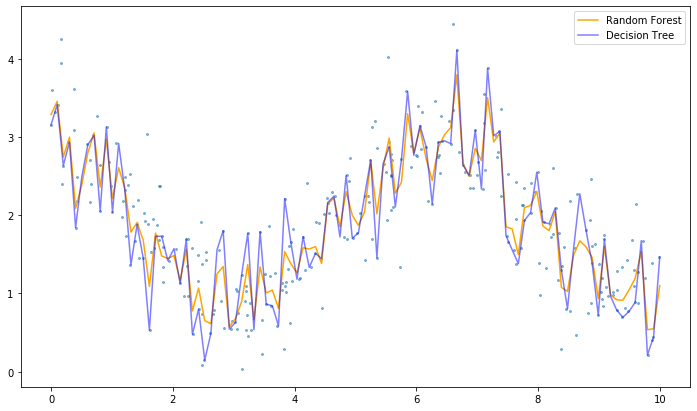

In [106]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SIZE = 300

noise = np.random.normal(0, .5, size=SIZE)
x = np.random.uniform(0, 10, size=SIZE)

intercept = 2

# y = m + b + some_noise
y = intercept + np.cos(x) + noise

fig, ax = plt.subplots(figsize=(12, 7))

# reshape is necessary because there is only one feature
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x.reshape(-1, 1), y)

ax.scatter(x, y, s=4, alpha=.5)
pred = rfr.predict(np.linspace(0, 10, 100).reshape(-1, 1))
ax.plot(np.linspace(0, 10, 100).reshape(-1, 1), pred, color='orange', label='Random Forest')


dt = DecisionTreeRegressor()
dt.fit(x.reshape(-1, 1), y)

pred = dt.predict(np.linspace(0, 10, 100).reshape(-1, 1))
ax.plot(np.linspace(0, 10, 100).reshape(-1, 1), pred, color='blue', alpha=.5, label='Decision Tree')
ax.legend();

## Boston Housing Example

In [87]:
boston = load_boston()

data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
target = boston['target']
X_train, X_test, y_train, y_test = train_test_split(data, target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Fit and Evaluate RandomForestRegressor

In [88]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, rf_preds)}')

Mean Squared Error: 8.269040645669282


### Compare Random Forest and single Decision tree

In [89]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, dt_preds)}')

Mean Squared Error: 20.94818897637795


### Now your turn, use random forest to help solve a classification problem with this data

In [90]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()